# London Fire Incidents Analysis

In [1]:
%matplotlib inline 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Downloading and loadng the data

In [2]:
# Loading the data
# import data_download

data_dir = "LFB-data"
# LFB_data = pd.read_csv(os.path.join(data_dir, "LFB Incident data - Datastore - with notional cost and UPRN from January 2009.csv"))
LFB_data = pd.read_csv(os.path.join(data_dir, "lfb_incident.csv"))
LFB_data.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,235138081,01 Jan 2009,2009,00:00:37,0,Special Service,Special Service,RTC,Road Vehicle,Car,...,319.0,Battersea,342.0,Clapham,2.0,2.0,2.0,1.0,255.0,1.0
1,1091,01 Jan 2009,2009,00:00:46,0,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2091,01 Jan 2009,2009,00:03:00,0,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,...,308.0,Edmonton,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
3,3091,01 Jan 2009,2009,00:04:27,0,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),...,210.0,Hillingdon,NaN,NaN,1.0,1.0,1.0,1.0,255.0,2.0
4,5091,01 Jan 2009,2009,00:05:39,0,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,...,233.0,Holloway,250.0,Holloway,1.0,2.0,2.0,1.0,255.0,1.0


In [3]:
# Total memory occupied by the Dataframe
Total_memory = round(LFB_data.memory_usage(deep=True).sum()/(1024*1024), 2)
print(f'Total Memory Used : {Total_memory} MB')

Total Memory Used : 2091.97 MB


### Primary Data analysis

In [4]:
LFB_data.shape

(1465060, 39)

In [5]:
LFB_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465060 entries, 0 to 1465059
Data columns (total 39 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   IncidentNumber                          1465060 non-null  object 
 1   DateOfCall                              1465060 non-null  object 
 2   CalYear                                 1465060 non-null  int64  
 3   TimeOfCall                              1465060 non-null  object 
 4   HourOfCall                              1465060 non-null  int64  
 5   IncidentGroup                           1465060 non-null  object 
 6   StopCodeDescription                     1465060 non-null  object 
 7   SpecialServiceType                      459204 non-null   object 
 8   PropertyCategory                        1465060 non-null  object 
 9   PropertyType                            1465060 non-null  object 
 10  AddressQualifier              

In [6]:
# Lets check if there are missing values

LFB_data.isnull().sum().any()

True

Yellow - Missing Values
Blue - Non Missing


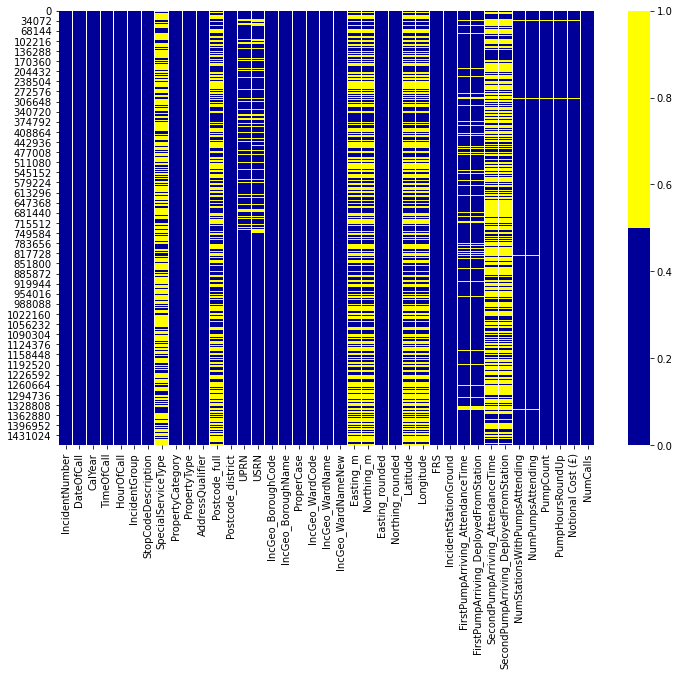

In [7]:
# Lets see if the data has missing values.

plt.figure(figsize = (12,8))
cols = LFB_data.columns[:]
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(LFB_data[cols].isnull(), cmap=sns.color_palette(colours))
print("Yellow - Missing Values\nBlue - Non Missing")

We can see that there are missing values

In [8]:
# Lets see whath columns have the missing values

LFB_data.isnull().sum()

IncidentNumber                                  0
DateOfCall                                      0
CalYear                                         0
TimeOfCall                                      0
HourOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1005856
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              706377
Postcode_district                               0
UPRN                                       141333
USRN                                       162871
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                                 4
IncGeo_WardName                                 4


## Exploratory data analysis

### Divide the data into numeric and categorical dataframes

In [9]:
# select numeric columns
df_numeric = LFB_data.select_dtypes(include=[np.number])
df_categorical = LFB_data.select_dtypes(exclude=[np.number])


#### Numerical data

In [10]:
df_numeric.shape

(1465060, 18)

In [11]:
df_numeric.columns.values

array(['CalYear', 'HourOfCall', 'UPRN', 'USRN', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude',
       'FirstPumpArriving_AttendanceTime',
       'SecondPumpArriving_AttendanceTime',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpHoursRoundUp', 'Notional Cost (£)', 'NumCalls'], dtype=object)

In [12]:
df_numeric

,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,2009,0,NaN,NaN,528652.0,176830.0,528650,176850,51.475812,-0.148894,319.0,342.0,2.0,2.0,2.0,1.0,255.0,1.0
1,2009,0,NaN,NaN,530485.0,179007.0,530450,179050,51.494957,-0.121712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2009,0,NaN,NaN,533773.0,194492.0,533750,194450,51.633342,-0.068488,308.0,NaN,1.0,1.0,1.0,1.0,255.0,2.0
3,2009,0,1.000215e+11,21401491.0,507738.0,182805.0,507750,182850,51.533882,-0.448089,210.0,NaN,1.0,1.0,1.0,1.0,255.0,2.0
4,2009,0,NaN,NaN,531058.0,185307.0,531050,185350,51.551441,-0.111120,233.0,250.0,1.0,2.0,2.0,1.0,255.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465055,2022,23,1.000995e+10,21401748.0,506341.0,174670.0,506350,174650,51.461026,-0.470670,510.0,NaN,1.0,1.0,1.0,1.0,364.0,2.0
1465056,2022,23,0.000000e+00,21606466.0,NaN,NaN,530250,186950,NaN,NaN,370.0,NaN,1.0,1.0,1.0,1.0,364.0,2.0
1465057,2022,23,1.000234e+11,21402032.0,508781.0,181838.0,508750,181850,51.524992,-0.433351,219.0,NaN,1.0,1.0,1.0,1.0,364.0,1.0
1465058,2022,23,0.000000e+00,22700543.0,NaN,NaN,535650,180950,NaN,NaN,321.0,NaN,1.0,1.0,1.0,1.0,364.0,1.0


##### Numerical Data visualization

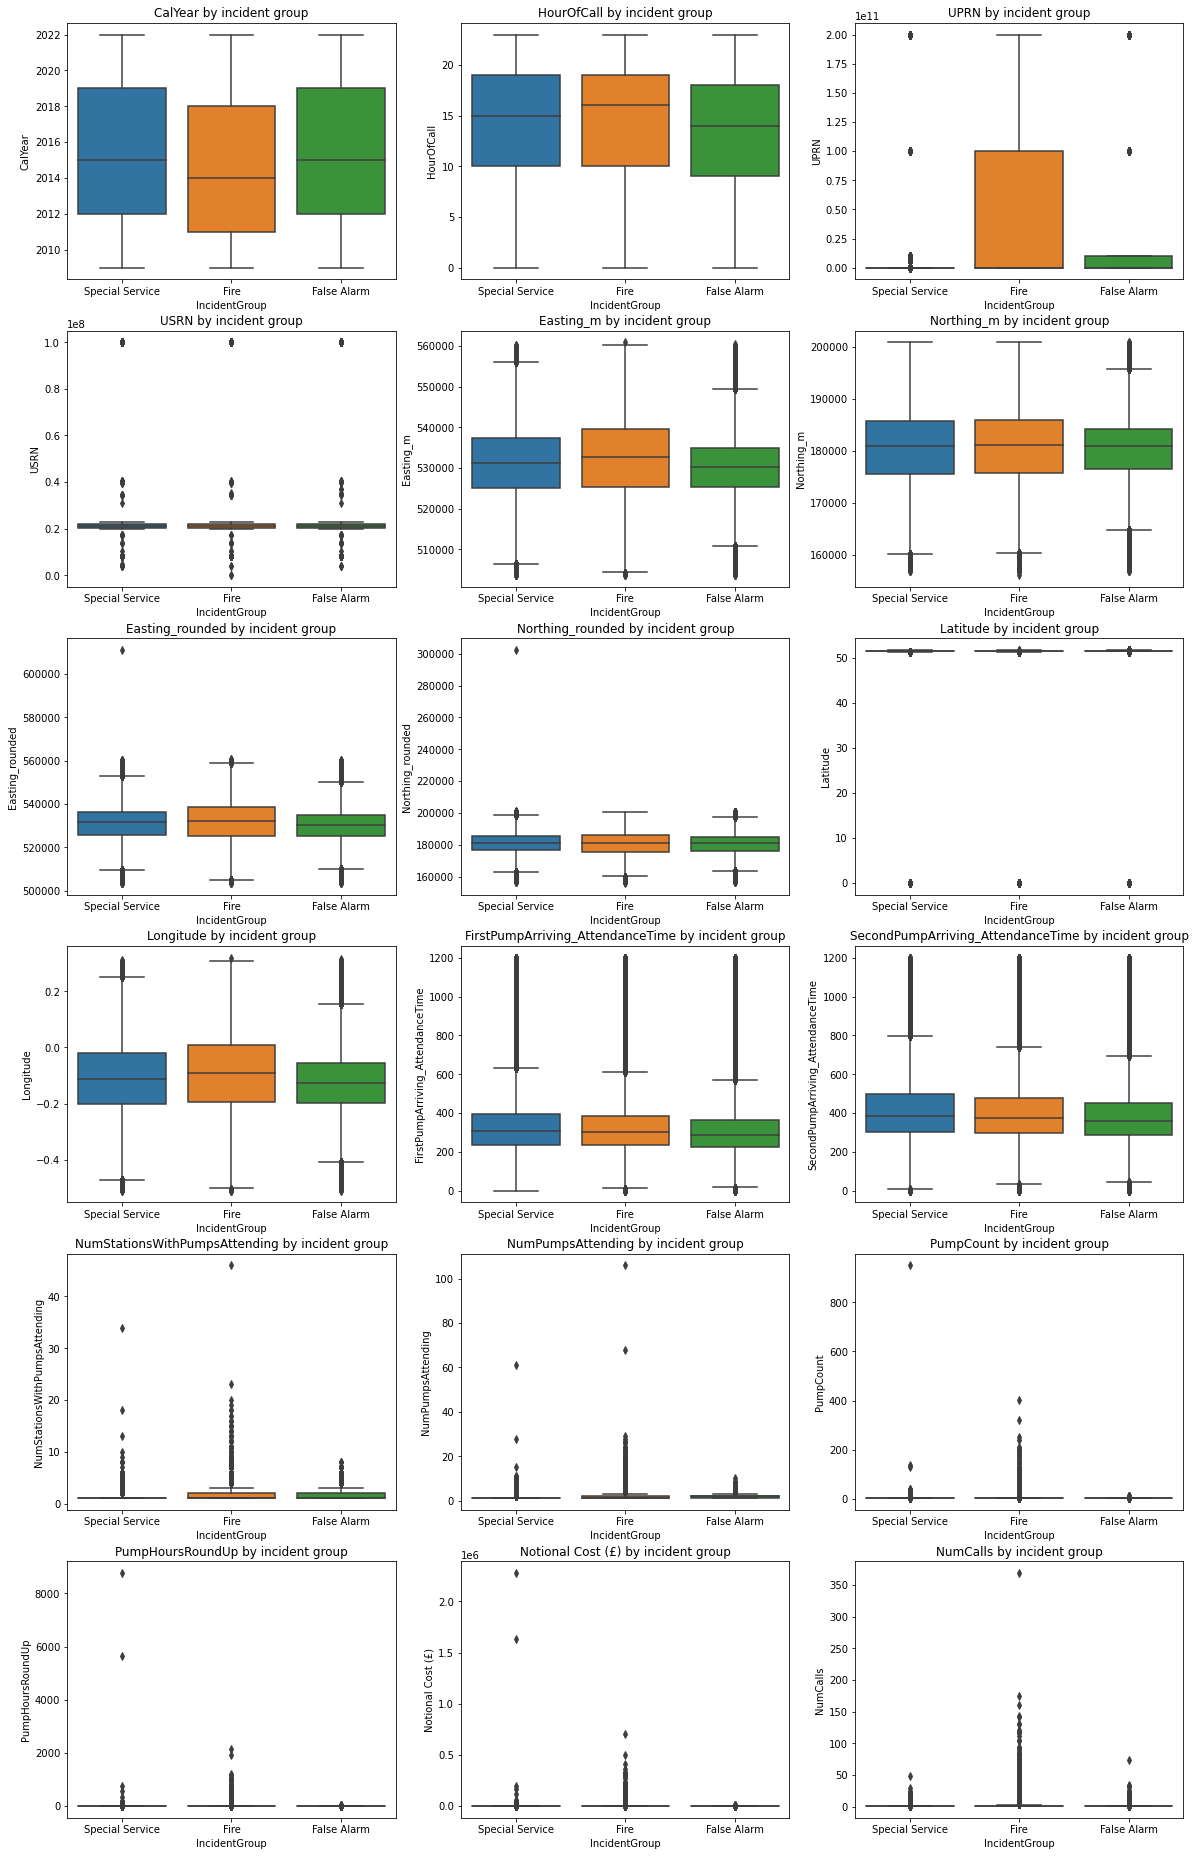

In [13]:
fig = plt.figure(figsize= (20,50))

for i in range(len(df_numeric.columns)):
    column = df_numeric.columns[i]
    sub = fig.add_subplot(9,3, i+1)
    chart = sns.boxplot(data=df_numeric, y=column, x = LFB_data["IncidentGroup"])
    chart.set_title(column + " by incident group")

We can realize that from the figure above, we have outliers.
We Need to take care of the outliers by removing them

### Categorical Data

In [14]:
df_categorical.shape

(1465060, 21)

In [15]:
df_categorical.columns.values

array(['IncidentNumber', 'DateOfCall', 'TimeOfCall', 'IncidentGroup',
       'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory',
       'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'IncGeo_BoroughCode', 'IncGeo_BoroughName',
       'ProperCase', 'IncGeo_WardCode', 'IncGeo_WardName',
       'IncGeo_WardNameNew', 'FRS', 'IncidentStationGround',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_DeployedFromStation'], dtype=object)

In [16]:
df_categorical

,IncidentNumber,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,...,IncGeo_BoroughCode,IncGeo_BoroughName,ProperCase,IncGeo_WardCode,IncGeo_WardName,IncGeo_WardNameNew,FRS,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_DeployedFromStation
0,235138081,01 Jan 2009,00:00:37,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to gazetteer location,SW11 4LB,...,E09000032,WANDSWORTH,Wandsworth,E05000620,Queenstown,Queenstown,London,Battersea,Battersea,Clapham
1,1091,01 Jan 2009,00:00:46,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest gazetteer location,SE1 7SG,...,E09000022,LAMBETH,Lambeth,E05000416,Bishop's,Bishop's,London,Lambeth,NaN,NaN
2,2091,01 Jan 2009,00:03:00,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside gazetteer location,N9 9EL,...,E09000010,ENFIELD,Enfield,E05000201,Haselbury,Haselbury,London,Edmonton,Edmonton,NaN
3,3091,01 Jan 2009,00:04:27,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,...,E09000017,HILLINGDON,Hillingdon,E05000332,Hillingdon East,Hillingdon East,London,Hillingdon,Hillingdon,NaN
4,5091,01 Jan 2009,00:05:39,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside gazetteer location,N7 8HG,...,E09000019,ISLINGTON,Islington,E05000375,Holloway,Holloway,London,Holloway,Holloway,Holloway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465055,096399-30062022,30 Jun 2022,23:42:53,False Alarm,AFA,NaN,Non Residential,Warehouse,Correct incident location,TW6 3RT,...,E09000017,HILLINGDON,Hillingdon,E05013570,HEATHROW VILLAGES,HEATHROW VILLAGES,London,Heathrow,Feltham,NaN
1465056,096401-30062022,30 Jun 2022,23:46:26,Special Service,Special Service,Effecting entry/exit,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,NaN,...,E09000019,ISLINGTON,Islington,E05013712,TOLLINGTON,TOLLINGTON,London,Holloway,Kentish Town,NaN
1465057,096402-30062022,30 Jun 2022,23:46:44,False Alarm,AFA,NaN,Non Residential,Pub/wine bar/bar,Correct incident location,UB4 8HX,...,E09000017,HILLINGDON,Hillingdon,E05013582,WOOD END,WOOD END,London,Hillingdon,Hillingdon,NaN
1465058,096403-30062022,30 Jun 2022,23:47:55,False Alarm,False alarm - Good intent,NaN,Dwelling,Purpose Built Flats/Maisonettes - 4 to 9 storeys,Correct incident location,NaN,...,E09000030,TOWER HAMLETS,Tower Hamlets,E05009332,SHADWELL,SHADWELL,London,Shadwell,Shadwell,NaN


In [18]:
# Drop the incident number column since we really dont need it

df_categorical.drop('IncidentNumber', axis = 1, inplace=True)

In [19]:
# Lets determine how many unique values each column has
df_categorical.nunique()

DateOfCall                                  4929
TimeOfCall                                 86385
IncidentGroup                                  3
StopCodeDescription                           10
SpecialServiceType                            21
PropertyCategory                               9
PropertyType                                 291
AddressQualifier                              11
Postcode_full                             113319
Postcode_district                            328
IncGeo_BoroughCode                            33
IncGeo_BoroughName                            33
ProperCase                                    33
IncGeo_WardCode                             1274
IncGeo_WardName                             1560
IncGeo_WardNameNew                          1546
FRS                                            1
IncidentStationGround                        103
FirstPumpArriving_DeployedFromStation        114
SecondPumpArriving_DeployedFromStation       113
dtype: int64

#### Missing values for categorical data

In [17]:
df_categorical.isnull().sum()

IncidentNumber                                  0
DateOfCall                                      0
TimeOfCall                                      0
IncidentGroup                                   0
StopCodeDescription                             0
SpecialServiceType                        1005856
PropertyCategory                                0
PropertyType                                    0
AddressQualifier                                0
Postcode_full                              706377
Postcode_district                               0
IncGeo_BoroughCode                              0
IncGeo_BoroughName                              0
ProperCase                                      0
IncGeo_WardCode                                 4
IncGeo_WardName                                 4
IncGeo_WardNameNew                              4
FRS                                             0
IncidentStationGround                           1
FirstPumpArriving_DeployedFromStation      119764


We can see that we have a couple of categorical columns with missing values